# The purpose of this project is to practice data wrangling and data mining.

***
<a id='questions'></a>
### The questions I will seek to answer:

***

* What is the distribution of people in the top five occupations by number of employees?
* What is the distribution of each gender in each of the top five occupations by number of employees?
* What insights can I gather from this information?

***

In [3]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# put my data into a dataframe with pandas
filepath = "C:/Users/there/Desktop/Data Cleaning Practice/MOCK_data.csv"
df = pd.read_csv(filepath)

In [5]:
# take a look at the data
df.head(10)

,id,first_name,last_name,email,gender,ip_address
0,1.0,Ram,McSpirron,rmcspirron0@howstuffworks.com,Male,Design Engineer
1,2.0,Allissa,NaN,abridgestock1@webmd.com,Genderqueer,Associate Professor
2,3.0,Cull,Celle,ccelle2@yahoo.co.jp,Male,Project Manager
3,4.0,Cindra,Edison,cedison3@comsenz.com,Female,Chemical Engineer
4,5.0,Sharon,Iglesias,siglesias4@elpais.com,Female,Associate Professor
5,6.0,Isador,McAllaster,NaN,Male,Associate Professor
6,7.0,Margaretha,Hedge,mhedge6@patch.com,Female,NaN
7,8.0,Della,Kirwood,dkirwood7@ox.ac.uk,NaN,Senior Cost Accountant
8,9.0,Lester,Lelievre,llelievre8@studiopress.com,Male,Assistant Manager
9,10.0,Wendeline,Bowdler,wbowdler9@cnn.com,Female,Design Engineer


<hr/>

## First Observations:

<hr/>

* We have nan values.

* I'm not sure if "Genderqueer" is one word or not; I'll need to look that up and make sure it is consistent.

* ip_address column has the wrong header; it should be "Occupation"

<hr/>

In [6]:
# Fixing the column header
df.rename(columns={'ip_address':'occupation'},inplace=True)

In [7]:
# Checking the column headers
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'occupation'], dtype='object')

In [8]:
# Finding out how much data I have
print(f"There are {df.size} cells.")
print(f"There are {df.shape[0]} rows.")
print(f"There are {df.shape[1]} columns.")

There are 6000 cells.
There are 1000 rows.
There are 6 columns.


In [9]:
# Finding out what percent of my data is missing
total_cells = df.size
missing_cells = df.isnull().sum().sum()
print(f"Total cells: {total_cells}")
print(f"Missing cells: {missing_cells}")
# For readability
print()
print(f"Percentage missing: {(missing_cells/total_cells)*100:.3f}%")

Total cells: 6000
Missing cells: 456

Percentage missing: 7.600%


***
## Second Observations:
***
The amount of data missing (7.600%) shouldn't ruin anything in this case, but I'm going to try and keep as much as I possibly can.
***

In [10]:
# Finding out the unique values in each column
df.nunique()

id            948
first_name    905
last_name     977
email         849
gender          8
occupation    176
dtype: int64

***
## Third Observations:
***
id should be 1000. There are 1000 rows, and each person should have a unique id.

I'm going to look at a statistical summary and see if I have missing or repeated values causing me to only see 948 unique values
***

In [11]:
# Checking statistical summary of the id column
df['id'].describe()

count     948.000000
mean      500.385021
std       286.905403
min         1.000000
25%       256.750000
50%       500.500000
75%       747.250000
max      1000.000000
Name: id, dtype: float64

***
It looks they are likely just missing; this should be easy to fix as long as they are in the correct order.
***

In [12]:
# Taking another look at the data to determine the order of rows based on id
df.head(10)

,id,first_name,last_name,email,gender,occupation
0,1.0,Ram,McSpirron,rmcspirron0@howstuffworks.com,Male,Design Engineer
1,2.0,Allissa,NaN,abridgestock1@webmd.com,Genderqueer,Associate Professor
2,3.0,Cull,Celle,ccelle2@yahoo.co.jp,Male,Project Manager
3,4.0,Cindra,Edison,cedison3@comsenz.com,Female,Chemical Engineer
4,5.0,Sharon,Iglesias,siglesias4@elpais.com,Female,Associate Professor
5,6.0,Isador,McAllaster,NaN,Male,Associate Professor
6,7.0,Margaretha,Hedge,mhedge6@patch.com,Female,NaN
7,8.0,Della,Kirwood,dkirwood7@ox.ac.uk,NaN,Senior Cost Accountant
8,9.0,Lester,Lelievre,llelievre8@studiopress.com,Male,Assistant Manager
9,10.0,Wendeline,Bowdler,wbowdler9@cnn.com,Female,Design Engineer


In [13]:
# Taking a look again, but at the tail this time
df.tail(10)

,id,first_name,last_name,email,gender,occupation
990,991.0,Zolly,Whiterod,zwhiterodri@domainmarket.com,Male,Automation Specialist III
991,992.0,Rad,Leabeater,rleabeaterrj@creativecommons.org,Male,Design Engineer
992,NaN,Amos,Linbohm,alinbohmrk@studiopress.com,Male,Food Chemist
993,994.0,Duncan,O'Hartnett,dohartnettrl@scientificamerican.com,NaN,Product Engineer
994,995.0,Leonardo,Deakes,ldeakesrm@zdnet.com,Male,Professor
995,996.0,Grata,Hawkslee,ghawksleern@dedecms.com,Female,Dental Hygienist
996,997.0,Brandy,Heyfield,NaN,Female,Account Coordinator
997,998.0,Conroy,Maymand,NaN,Male,Nurse Practicioner
998,999.0,Harvey,Gallyon,hgallyonrq@merriam-webster.com,Male,NaN
999,1000.0,Hugibert,Yushin,NaN,Male,Operator


***
It looks linear to me. This is a good thing as trying to sort without filling the values would have been a nightmare. Could have been better to just drop those rows if that were the case. I will need to look into how to handle a situation like that.
***

In [14]:
# Interpolating the id column
id_check = df['id'] # Creating a variable to do this to first so I don't break anything
id_check.interpolate(inplace=True)

In [15]:
# Checking the head
id_check.head(20)

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
Name: id, dtype: float64

In [16]:
# Checking the tail
id_check.tail(20)

980     981.0
981     982.0
982     983.0
983     984.0
984     985.0
985     986.0
986     987.0
987     988.0
988     989.0
989     990.0
990     991.0
991     992.0
992     993.0
993     994.0
994     995.0
995     996.0
996     997.0
997     998.0
998     999.0
999    1000.0
Name: id, dtype: float64

***
That looks like that worked well. Now, I'm going to interpolate the actual column.
***

In [17]:
# Interpolating the 'id' column in the dataframe
df['id'].interpolate(inplace=True)

In [18]:
# Checking the statistical summary again
df['id'].describe()

count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: id, dtype: float64

***
That looks much better.
***

In [19]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [20]:
# Checking for duplicated emails
df['email'].duplicated().sum()

150

***
I had a feeling that might happen. This is a problem. I need to make sure the 150 duplicates are NaN values rather than duplicate email addresses.
***

In [21]:
# Checking the sum of NaN values in the 'email' column
df['email'].isnull().sum()

151

***
Interesting: 150 duplicates; 151 NaN values.

There is a parameter in .duplicated() that can help here:

* ***.duplicated().sum()*** will count duplicates as 1
    - Example: person@email, person@email, another_person@email will say there is 1 duplicate.
* ***.duplicated(keep=False).sum()*** will count ***all*** duplicates
    - Example: person@email, person@email, another_person@email will say there are 2 duplicates.
 
I'm going to add the 'keep' parameter and set it to false to see if this is the cause of the discrepancy.
***

In [22]:
# Checking for duplicated emails
df['email'].duplicated(keep=False).sum()

151

In [23]:
# Checking the sum of NaN values in the 'email' column
df['email'].isnull().sum()

151

***
That's better.
***

***
### Fourth Observation:
***
* There are no duplicate rows at this point. This tells me I should be able to change NaN to something more useful such as, "Did Not Specify"; this should allow me to keep all of this data.
* There are 150 duplicated emails; this _is_ a problem, however I don't believe I need the email column for this project.
* I don't believe I need to email column for my analysis, and will likely drop it near the end of this process. Saving this to last should keep me from losing data I may end up needing later.
***

In [24]:
# Filling nan values with "Did Not Specify"
cols_to_fill = ['first_name','last_name','email','gender','occupation'] # Creating a list to make code more readable
testing = df[cols_to_fill].fillna("Did Not Specify") # Creating a variable to test my code so I don't break anything
testing.head(25) # Taking a look at the head to check my work

,first_name,last_name,email,gender,occupation
0,Ram,McSpirron,rmcspirron0@howstuffworks.com,Male,Design Engineer
1,Allissa,Did Not Specify,abridgestock1@webmd.com,Genderqueer,Associate Professor
2,Cull,Celle,ccelle2@yahoo.co.jp,Male,Project Manager
3,Cindra,Edison,cedison3@comsenz.com,Female,Chemical Engineer
4,Sharon,Iglesias,siglesias4@elpais.com,Female,Associate Professor
5,Isador,McAllaster,Did Not Specify,Male,Associate Professor
6,Margaretha,Hedge,mhedge6@patch.com,Female,Did Not Specify
7,Della,Kirwood,dkirwood7@ox.ac.uk,Did Not Specify,Senior Cost Accountant
8,Lester,Lelievre,llelievre8@studiopress.com,Male,Assistant Manager
9,Wendeline,Bowdler,wbowdler9@cnn.com,Female,Design Engineer


In [25]:
# Taking a look at the tail to check my work
testing.tail(25)

,first_name,last_name,email,gender,occupation
975,Cynthie,Kolushev,ckolushevr3@last.fm,Female,Nurse Practicioner
976,Carmella,Ropartz,cropartzr4@europa.eu,Female,Did Not Specify
977,Phylis,Vasyatkin,pvasyatkinr5@mapy.cz,Did Not Specify,Did Not Specify
978,Daniel,Harrap,Did Not Specify,Did Not Specify,Did Not Specify
979,Humberto,Burnell,hburnellr7@state.gov,Male,Mechanical Systems Engineer
980,Stacee,Goodricke,sgoodricker8@weebly.com,Male,Software Consultant
981,Angie,Cartmel,acartmelr9@ning.com,Female,Civil Engineer
982,Did Not Specify,Limeburn,nlimeburnra@google.cn,Did Not Specify,Chemical Engineer
983,Xever,Kersting,xkerstingrb@narod.ru,Male,Did Not Specify
984,Marchelle,Walas,mwalasrc@cbslocal.com,Female,Human Resources Manager


***
Looks like that works. Now I will execute that same process on the dataframe.
***

In [26]:
# Executing on the dataframe
df[cols_to_fill] = df[cols_to_fill].fillna("Did Not Specify")
df.head(25)

,id,first_name,last_name,email,gender,occupation
0,1.0,Ram,McSpirron,rmcspirron0@howstuffworks.com,Male,Design Engineer
1,2.0,Allissa,Did Not Specify,abridgestock1@webmd.com,Genderqueer,Associate Professor
2,3.0,Cull,Celle,ccelle2@yahoo.co.jp,Male,Project Manager
3,4.0,Cindra,Edison,cedison3@comsenz.com,Female,Chemical Engineer
4,5.0,Sharon,Iglesias,siglesias4@elpais.com,Female,Associate Professor
5,6.0,Isador,McAllaster,Did Not Specify,Male,Associate Professor
6,7.0,Margaretha,Hedge,mhedge6@patch.com,Female,Did Not Specify
7,8.0,Della,Kirwood,dkirwood7@ox.ac.uk,Did Not Specify,Senior Cost Accountant
8,9.0,Lester,Lelievre,llelievre8@studiopress.com,Male,Assistant Manager
9,10.0,Wendeline,Bowdler,wbowdler9@cnn.com,Female,Design Engineer


***
### Fifth Observation:
***
Everything seems to be alright at this point. I will run a few lines of code to trim off any excess whitespace and view some visualizations.
***

In [27]:
# Testing before committing to the dataframe
cols_to_strip = ['first_name','last_name','email','gender','occupation']

test = df[cols_to_strip].apply(lambda x: x.str.strip()) # The lambda does the same thing as a for loop
'''
.apply(lambda x: x.str.strip()) functions exactly as a for loop.

It is applying the function to the cols_to_strip in the dataframe.

x = each column (one at a time just like a for loop)

x.str.strip() converts to a string and strips away any excess whitespace on the ends
'''
test.head()

,first_name,last_name,email,gender,occupation
0,Ram,McSpirron,rmcspirron0@howstuffworks.com,Male,Design Engineer
1,Allissa,Did Not Specify,abridgestock1@webmd.com,Genderqueer,Associate Professor
2,Cull,Celle,ccelle2@yahoo.co.jp,Male,Project Manager
3,Cindra,Edison,cedison3@comsenz.com,Female,Chemical Engineer
4,Sharon,Iglesias,siglesias4@elpais.com,Female,Associate Professor


***
Nothing broke, so I will apply it to the dataframe.
***

In [28]:
# Cleaning any whitespace from the dataframe
df[cols_to_strip] = df[cols_to_strip].apply(lambda x: x.str.strip())

***
# Beginning My Analysis
***

In [29]:
# I want to see a statistical summary of ALL data
df.describe(include='all')

,id,first_name,last_name,email,gender,occupation
count,1000.000000,1000,1000,1000,1000,1000
unique,NaN,906,978,850,9,177
top,NaN,Did Not Specify,Did Not Specify,Did Not Specify,Female,Did Not Specify
freq,NaN,25,18,151,433,127
mean,500.500000,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,NaN,NaN


***
## Sixth Observations:
***
* "Did Not Specify" is the most recurring entry.
    - The frequency of each value is insignificant overall
    - with the exception of "Female" in Gender
        * That data point is a significant portion of the column, but that is a likely occurence.
***

***
My mission with this project has nothing to do with the email addresses at all, and they don't offer any dimensional insight, so I believe I can drop this column and move on.

[My Questions](#questions)
***

In [30]:
# Dropping the email column
test = df.drop(columns=['email']) # Using a test variable
test.head()

,id,first_name,last_name,gender,occupation
0,1.0,Ram,McSpirron,Male,Design Engineer
1,2.0,Allissa,Did Not Specify,Genderqueer,Associate Professor
2,3.0,Cull,Celle,Male,Project Manager
3,4.0,Cindra,Edison,Female,Chemical Engineer
4,5.0,Sharon,Iglesias,Female,Associate Professor


In [31]:
# Dropping 'email' from the dataframe
df.drop(columns=['email'],inplace=True)
df.head()

,id,first_name,last_name,gender,occupation
0,1.0,Ram,McSpirron,Male,Design Engineer
1,2.0,Allissa,Did Not Specify,Genderqueer,Associate Professor
2,3.0,Cull,Celle,Male,Project Manager
3,4.0,Cindra,Edison,Female,Chemical Engineer
4,5.0,Sharon,Iglesias,Female,Associate Professor


***
### Visualizations:
***

***
# Distribution of Top 25 Occupations
***

Text(0, 0.5, 'Frequency')

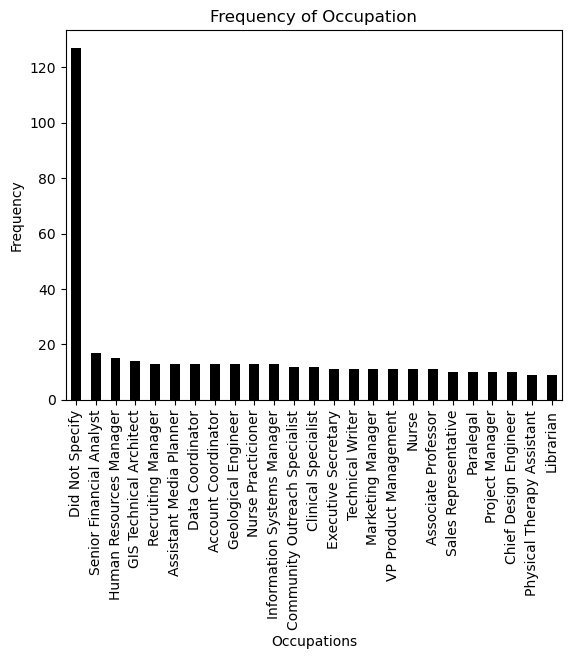

In [32]:
# Distribution of occupations
spread = df['occupation'].value_counts()
spread.head(25).plot(kind='bar',x='occupation',y='frequency',color='black')
plt.title("Frequency of Occupation")
plt.xlabel("Occupations")
plt.ylabel("Frequency")

***
## Seventh Observations:
***
"Did Not Specify" is overwhelming the visualization, so I will remove it from the graph.

I'm also going to narrow this down to the top 5 occupations.
***

Text(2, 1, '"Did Not Specify" is omitted')

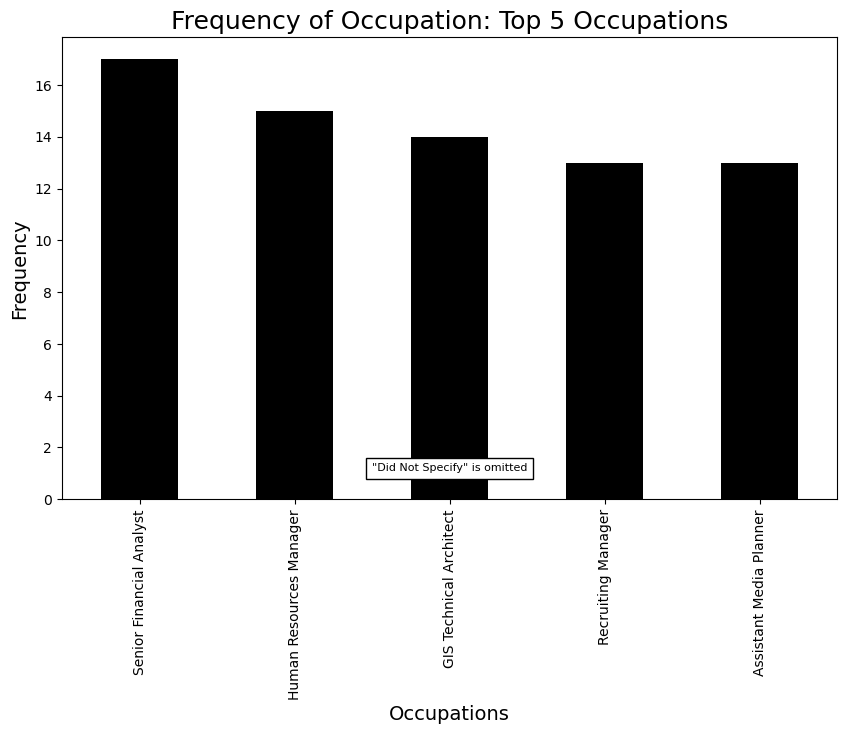

In [33]:
# Distribution of occupations minus "Did Not Specify"
spread = df['occupation'].value_counts()
spread = spread[spread.index != "Did Not Specify"]
spread.head().plot(kind='bar',x='occupation',y='frequency',color='black',figsize=(10,6))
plt.title("Frequency of Occupation: Top 5 Occupations",fontsize=18)
plt.xlabel("Occupations",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.text(s='"Did Not Specify" is omitted',ha='center',va='bottom',x=2,y=1,fontsize=8,bbox=dict(facecolor='white',edgecolor='black'))

***
That is much more helpful.

Now, I need the distribution of gender in the top 5 occupations
***

In [36]:
# This is a process

# Getting the names of the top 5 occupations by index
occupations = df['occupation'].value_counts().head().index # .index returns only the names of the occupations, not the counts

# Using occupations to filter the dataframe and get the top 5 occupations
top_5_occupations = df[df['occupation'].isin(occupations)]

# Count the number of people by gender in each of these occupations
genders = top_5_occupations.groupby(['occupation','gender']).size().reset_index(name='count')

Text(0.9, -15, '*Graph displays the number of each gender in the top 5 occupations by volume')

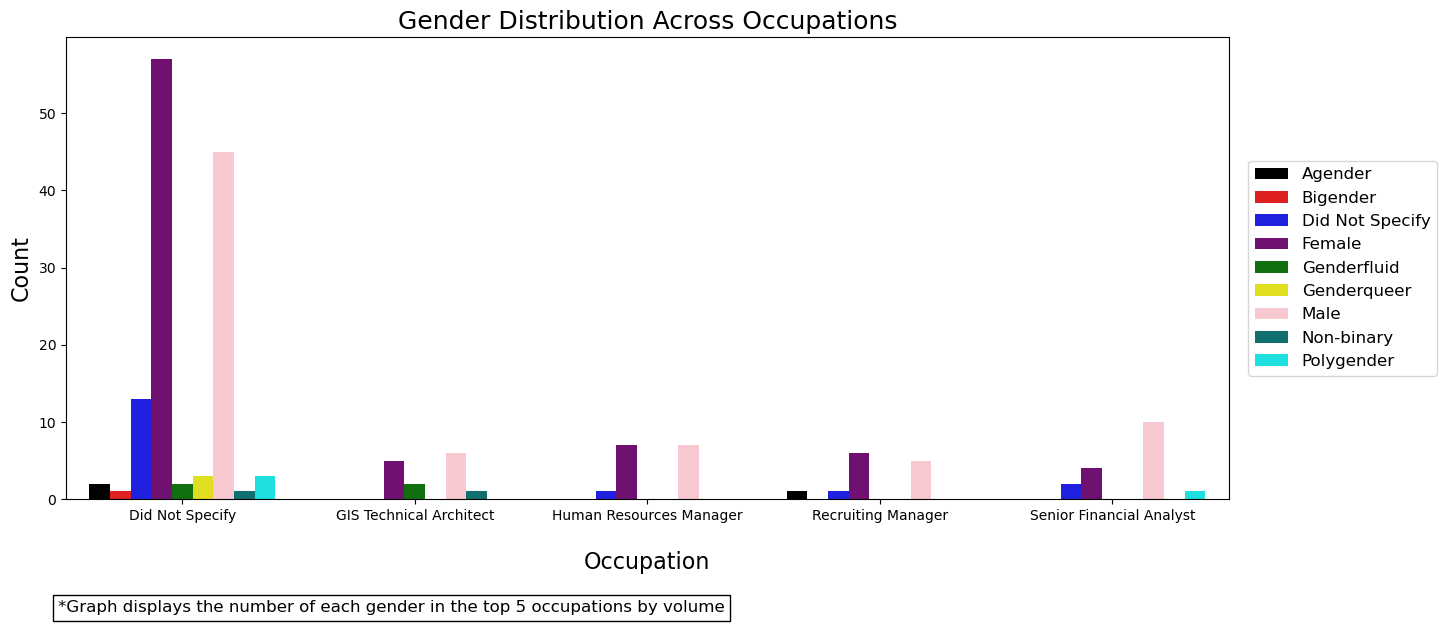

In [37]:
# Bar plot
custom_palette = ['black','red','blue','purple','green','yellow','pink','teal','cyan']
plt.figure(figsize=(15,6))
sns.barplot(data=genders,x='occupation',y='count',hue='gender',palette=custom_palette)
plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5),fontsize=12)
plt.title("Gender Distribution Across Occupations",fontsize=18)
plt.xlabel("Occupation",fontsize=16,labelpad=20)
plt.ylabel("Count",fontsize=16)
plt.text(s="*Graph displays the number of each gender in the top 5 occupations by volume",fontsize=12,
         ha='center',va='bottom',x=0.9,y=-15,bbox=dict(facecolor='white',edgecolor='black'))

***
## Now, we can used merged_df to read the actual percentages
***

In [38]:
'''
To get the actual numerical values for the percentages of each gender in each of the top 5 occupations by volume, we have some "groupbying" to do.
'''

# Total count
total_count = top_5_occupations.groupby('occupation').size().reset_index(name='total')

# Now we merge them
merged_df = pd.merge(genders,total_count,on='occupation')

# Now we can calculate the allocations
merged_df['Percentages'] = (merged_df['count']/merged_df['total'])*100

merged_df.head()

,occupation,gender,count,total,Percentages
0,Did Not Specify,Agender,2,127,1.574803
1,Did Not Specify,Bigender,1,127,0.787402
2,Did Not Specify,Did Not Specify,13,127,10.236220
3,Did Not Specify,Female,57,127,44.881890
4,Did Not Specify,Genderfluid,2,127,1.574803


In [42]:
# Some clever report generating

from docx import Document
from docx.shared import Pt

doc = Document()

doc.add_heading("Gender Distribution in Top 5 Occupations by Volume",0)

doc.add_paragraph("This document contains the percentage of each gender in each of the top five occupations by volume (the number of people who have each job). An example of what you will be reading: '1.574803149606299% of employees serving as Did Not Specify identify as Agender'. This means ~1.5748% of the employees who chose not to specify their occupation identify as Agender.")

fine_print = doc.add_paragraph()
run = fine_print.add_run("*The numbers are exact based on the data and cover only the top five occupations by volume.")
run.font.size = Pt(8)

for index,row in merged_df.iterrows():
    i = row['Percentages']
    j = row['occupation']
    k = row['gender']
    doc.add_paragraph(f"{i}% of employees serving as {j} identify as {k}")

doc.save("C:/Users/there/Desktop/Data Cleaning Practice/Gender Distributions Across Top Five Occupations by Volume.docx")

***
I cleaned that document up a little manually, but the hardest part of that work is now done.
***

***
# Findings:
***
I saw in the top 5 jobs by volume, Senior Financial Analyst was the number one job. When I look at the distribution of gender across the top 5 jobs by volume, I can see the majority of Female, Male, and workers who chose not to specify their gender also chose not to specify their occupation.

We can see from the "Did Not Specify" bar plot on the x-axis that the workers identifying as these genders make up the majority, while we can also see significantly fewer females, males, and workers who chose not to specify their gender in the other top occupations.

One significant finding is that male and female identifying workers make up the majority of the people serving in the top 5 occupations by volume.

###### *More information on the percentages of genders in the top five occupations by volume will be available in: Gender Distributions Across Top Five Occupations by Volume.docx; I will link to it in the README file of the repository for this project
***
# Insights:

* Occupation: Did Not Specify is mostly made up of employees who identify as male, female, or "Did Not Specify"

    * ~44.88% of employees serving as Did Not Specify identify as Female
    * ~35.433% of employees serving as Did Not Specify identify as Male
    * ~10.24% of employees who Did Not Specify their occupation also did not specify their gender.

* Male and Female are the most common genders across the top five occupations by volume.

* The majority who opted to not specify may not feel comfortable giving this information; for future's sake, an option "Prefer not to say" could be offered to give people the chance to let us know they don't wish to give that information (which would be good information to know) rather than just having everyone skip over the question.

* I could speculate also that because of social pressures surrounding the conversation about gender identity employees are hesitant to participate in such talks as a way of protecting themselves from harsh criticism, judgement, or even hatefulness. Giving them an outlet they can feel safe using would be beneficial.

***
# Questions I sought to answer:

* What is the distribution of people in the top five occupations by number of employees?
* What is the distribution of each gender in each of the top five occupations by number of employees?
* What insights can I gather from this information?
***